# Exploratory Data Analysis with NLP Tools

In [148]:
#!pip install pandas-profiling

In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os
import nltk
from nltk.corpus import stopwords
from collections import Counter
import pandas_profiling
import warnings
warnings.filterwarnings('ignore')

In [150]:
# Set path to cryptocurrency csv files
path = '../Data/Reddit_Comments/Cryptocurrency/'

files = os.listdir(path)

# Create list of csv file names
csv_list = []
for f in files:
    csv_list.append(f)

In [151]:
csv_list = csv_list[:-1]
csv_list

['Cryptocurrency_2021-08-07.csv',
 'Cryptocurrency_2021-08-08.csv',
 'Cryptocurrency_2021-08-09.csv',
 'Cryptocurrency_2021-08-10.csv',
 'Cryptocurrency_2021-08-11.csv',
 'Cryptocurrency_2021-08-12.csv',
 'Cryptocurrency_2021-08-13.csv',
 'Cryptocurrency_2021-08-14.csv',
 'Cryptocurrency_2021-08-15.csv',
 'Cryptocurrency_2021-08-16.csv',
 'Cryptocurrency_2021-08-17.csv',
 'Cryptocurrency_2021-08-18.csv',
 'Cryptocurrency_2021-08-19.csv',
 'Cryptocurrency_2021-08-20.csv',
 'Cryptocurrency_2021-08-21.csv',
 'Cryptocurrency_2021-08-22.csv',
 'Cryptocurrency_2021-08-23.csv',
 'Cryptocurrency_2021-08-24.csv',
 'Cryptocurrency_2021-08-25.csv',
 'Cryptocurrency_2021-08-26.csv',
 'Cryptocurrency_2021-08-27.csv',
 'Cryptocurrency_2021-08-28.csv',
 'Cryptocurrency_2021-08-29.csv',
 'Cryptocurrency_2021-08-30.csv',
 'Cryptocurrency_2021-08-31.csv',
 'Cryptocurrency_2021-09-01.csv',
 'Cryptocurrency_2021-09-02.csv',
 'Cryptocurrency_2021-09-03.csv',
 'Cryptocurrency_2021-09-04.csv',
 'Cryptocurren

## Read csv file

In [152]:
csv_list[0]

'Cryptocurrency_2021-08-07.csv'

In [153]:
df = pd.read_csv(path + csv_list[0])
df.head()

author author_fullname author_premium  \
0        HiCarumba     t2_95jx76vi          False   
1           baeiby     t2_7htt0be3          False   
2      NotRyanPace        t2_xgk0k          False   
3  BountyManagerBD     t2_8nbdzghw          False   
4       Gabus_Bego     t2_bbs0wmdt          False   

                                                body collapsed_reason_code  \
0                      Yes Brother. This is the way.                   NaN   
1  Lol to be very honest, I knew close to zilch a...                   NaN   
2  End of year, take the "Last call for ETH under...                   NaN   
3  ESCROW PROTOCOL are aiming to attract users fr...                   NaN   
4                                Thank you, my dude.                   NaN   

   comment_type  created_utc  score       id   parent_id  \
0           NaN   1628333279      1  h81jxny  t1_h81jvaa   
1           NaN   1628333279      2  h81jxnr  t1_h81jn5u   
2           NaN   1628333278      1  h81jxmq  t1_h81jqki   
3           NaN   1628333277      1  h81jxlg   t3_o2e67b   
4           NaN   1628333276      1  h81jxk6  t1_h81jtfb   

                                           permalink  
0  /r/CryptoCurrency/comments/ozr28z/it_was_proph...  
1  /r/CryptoCurrency/comments/ozqz9m/i_trust_peop...  
2  /r/CryptoCurrency/comments/ozinnf/daily_discus...  
3  /r/CryptoCurrency/comments/o2e67b/escrow_proto...  
4  /r/CryptoCurrency/comments/ozinnf/daily_discus...

In [154]:
df.shape

(100000, 11)

In [155]:
df.describe()

comment_type   created_utc          score
count           0.0  1.000000e+05  100000.000000
mean            NaN  1.628359e+09       2.152550
std             NaN  2.351560e+04       8.935004
min             NaN  1.628316e+09     -38.000000
25%             NaN  1.628340e+09       1.000000
50%             NaN  1.628358e+09       1.000000
75%             NaN  1.628379e+09       2.000000
max             NaN  1.628402e+09    1381.000000

In [156]:
df.dtypes

author                    object
author_fullname           object
author_premium            object
body                      object
collapsed_reason_code     object
comment_type             float64
created_utc                int64
score                      int64
id                        object
parent_id                 object
permalink                 object
dtype: object

## Data Cleaning

In [157]:
# Identify number of duplicate rows
duplicate_rows_df = df[df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

number of duplicate rows:  (0, 11)


In [158]:
# Remove all rows that have NaN in df['body']
df = df[df['body'].notna()]

In [159]:
df = df[df.author != "AutoModerator"]

In [160]:
df.head()

author author_fullname author_premium  \
0        HiCarumba     t2_95jx76vi          False   
1           baeiby     t2_7htt0be3          False   
2      NotRyanPace        t2_xgk0k          False   
3  BountyManagerBD     t2_8nbdzghw          False   
4       Gabus_Bego     t2_bbs0wmdt          False   

                                                body collapsed_reason_code  \
0                      Yes Brother. This is the way.                   NaN   
1  Lol to be very honest, I knew close to zilch a...                   NaN   
2  End of year, take the "Last call for ETH under...                   NaN   
3  ESCROW PROTOCOL are aiming to attract users fr...                   NaN   
4                                Thank you, my dude.                   NaN   

   comment_type  created_utc  score       id   parent_id  \
0           NaN   1628333279      1  h81jxny  t1_h81jvaa   
1           NaN   1628333279      2  h81jxnr  t1_h81jn5u   
2           NaN   1628333278      1  h81jxmq  t1_h81jqki   
3           NaN   1628333277      1  h81jxlg   t3_o2e67b   
4           NaN   1628333276      1  h81jxk6  t1_h81jtfb   

                                           permalink  
0  /r/CryptoCurrency/comments/ozr28z/it_was_proph...  
1  /r/CryptoCurrency/comments/ozqz9m/i_trust_peop...  
2  /r/CryptoCurrency/comments/ozinnf/daily_discus...  
3  /r/CryptoCurrency/comments/o2e67b/escrow_proto...  
4  /r/CryptoCurrency/comments/ozinnf/daily_discus...

In [161]:
bitcoin_df = df[df['body'].str.contains('Bitcoin|BTC', case=False)]
bitcoin_df.head()

author author_fullname author_premium  \
6          atomwest314       t2_x50okt           True   
23           Shrappy16     t2_4e2hp2d0          False   
29       Odd_Copy_8077     t2_ajd0894j          False   
91   Much-Weekend-8882     t2_66sa37r1          False   
114           itsglocx     t2_c3slvp4i          False   

                                                  body collapsed_reason_code  \
6    i noticed this too peeps like 'o wow ICP go up...                   NaN   
23   Probably know the answer: If you earned enough...                   NaN   
29   A boy asked his bitcoin-investing dad for 1 bi...                   NaN   
91             Is this all time high of eth/btc ratio?                   NaN   
114  can you imagine being mad at bitcoin going dow...                   NaN   

     comment_type  created_utc  score       id   parent_id  \
6             NaN   1628333275      3  h81jxhz   t3_ozr2hx   
23            NaN   1628333265      1  h81jx4f   t3_oznwv4   
29            NaN   1628333261      4  h81jwxn  t1_h81jr69   
91            NaN   1628333204      2  h81juiz   t3_ozinnf   
114           NaN   1628341913      1  h81wcat   t3_ozsz9f   

                                             permalink  
6    /r/CryptoCurrency/comments/ozr2hx/can_we_pleas...  
23   /r/CryptoCurrency/comments/oznwv4/eth_just_com...  
29   /r/CryptoCurrency/comments/ozinnf/daily_discus...  
91   /r/CryptoCurrency/comments/ozinnf/daily_discus...  
114  /r/CryptoCurrency/comments/ozsz9f/a_snapshot_i...

## Pandas Profiling Report

In [162]:
# Pandas profile report for profile analysis of top datset
profile = pandas_profiling.ProfileReport(df)
profile

Render HTML: 100%|██████████| 1/1 [00:02<00:00,  2.09s/it]


In [163]:
# Pandas profile report for profile analysis of top datset
profile = pandas_profiling.ProfileReport(bitcoin_df)
profile

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.48s/it]


## Analyzing Text Statistics

In [164]:
# Word Number Histogram
def word_number_hist(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()

In [165]:
word_number_hist(df['body'])

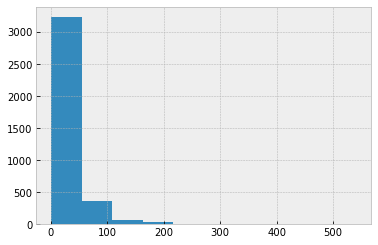

In [166]:
word_number_hist(bitcoin_df['body'])

In [167]:
# Average word length histogram for each sentence
def word_length_hist(text):
    text.str.split().\
        apply(lambda x : [len(i) for i in x]). \
        map(lambda x: np.mean(x)).\
        hist()

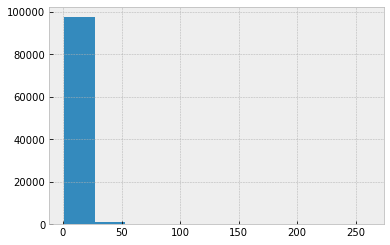

In [168]:
word_length_hist(df['body'])

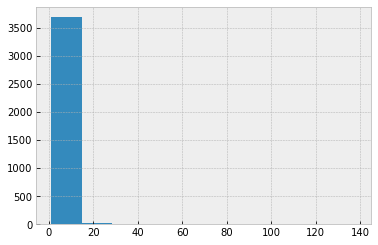

In [169]:
word_length_hist(bitcoin_df['body'])

## NLTK

In [170]:
nltk.download('stopwords')
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [171]:
# Plot Top Stopwords Barchart
def top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

In [172]:
top_stopwords_barchart(df['body'])

In [173]:
top_stopwords_barchart(bitcoin_df['body'])

In [174]:
# Top Non-Stopwords Barchart
def top_words_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

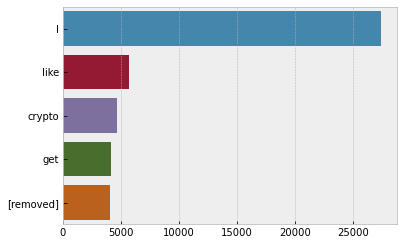

In [175]:
top_words_barchart(df['body'])

In [176]:
top_words_barchart(bitcoin_df['body'])

## Ngram Exploration

In [177]:
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter
from nltk.util import ngrams

def top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

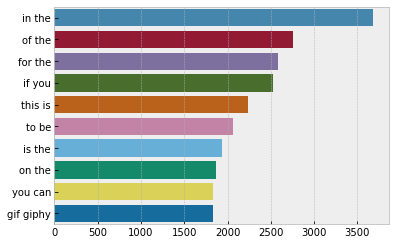

In [178]:
top_ngrams_barchart(df['body'],2)

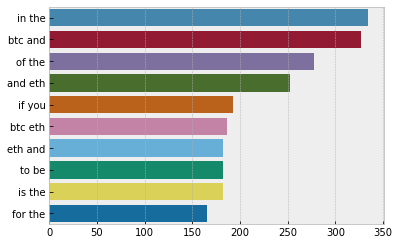

In [179]:
top_ngrams_barchart(bitcoin_df['body'],2)

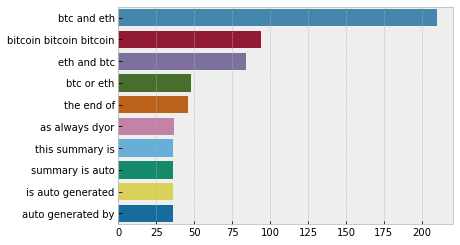

In [180]:
top_ngrams_barchart(bitcoin_df['body'],3)

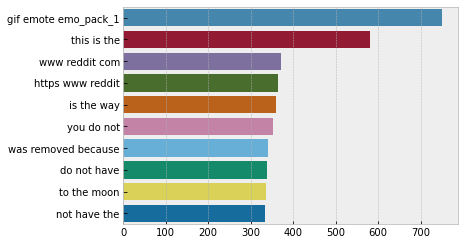

In [181]:
top_ngrams_barchart(df['body'],3)

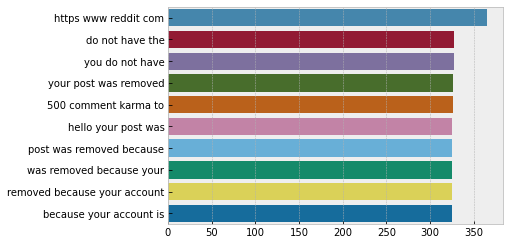

In [182]:
top_ngrams_barchart(df['body'],4)

## Topic Modeling Exploration with pyLDAvis

In [183]:
import numpy as np
import nltk
from nltk.corpus import stopwords
import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis
import pyLDAvis.gensim_models

nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [184]:
def get_lda_objects(text):
    nltk.download('stopwords')    
    stop=set(stopwords.words('english'))

    
    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    dic=gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]
    
    lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
    
    return lda_model, bow_corpus, dic

def lda_vis(lda_model, bow_corpus, dic):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dic)
    return vis

In [185]:
df2 = df

In [186]:
lda_model, bow_corpus, dic = get_lda_objects(df2['body'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [187]:
lda_model.show_topics()

[(0,
  '0.050*"removed" + 0.027*"post" + 0.021*"What" + 0.015*"http" + 0.013*"comment" + 0.012*"day" + 0.012*"Thanks" + 0.011*"Good" + 0.010*"daily" + 0.007*"Thank"'),
 (1,
  '0.027*"ETH" + 0.021*"gif" + 0.018*"buy" + 0.015*"deleted" + 0.015*"BTC" + 0.011*"sell" + 0.009*"year" + 0.009*"DCA" + 0.008*"price" + 0.008*"bought"'),
 (2,
  '0.019*"n\'t" + 0.016*"crypto" + 0.011*"people" + 0.010*"money" + 0.009*"get" + 0.009*"make" + 0.008*"like" + 0.007*"would" + 0.007*"The" + 0.007*"think"'),
 (3,
  '0.018*"moon" + 0.018*"like" + 0.015*"good" + 0.010*"got" + 0.010*"That" + 0.009*"You" + 0.008*"get" + 0.006*"love" + 0.006*"right" + 0.006*"..."')]

In [188]:
lda_vis(lda_model, bow_corpus, dic)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.140849  0.133309       1        1  47.920807
3     -0.123265  0.110057       2        1  22.161900
1     -0.081673 -0.272529       3        1  18.193866
0      0.345787  0.029163       4        1  11.723427, topic_info=          Term         Freq        Total Category  logprob  loglift
132    removed  4267.000000  4267.000000  Default  30.0000  30.0000
29         ETH  3606.000000  3606.000000  Default  29.0000  29.0000
390       post  3075.000000  3075.000000  Default  28.0000  28.0000
334        gif  2719.000000  2719.000000  Default  27.0000  27.0000
826       moon  4018.000000  4018.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
380        How   326.243479   958.648015   Topic4  -5.5672   1.0657
2003  question   290.389370   476.877257   Topic4  -5.6836   1.6475
2386       bot   288.099559   522.098862   Topic4  -5.6915   1.5490
404        You   309.302580  3311.809322   Topic4  -5.6205  -0.2273
630        top   293.236495   825.692151   Topic4  -5.6739   1.1083

[256 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
457       1  0.430187    'll
457       2  0.467018    'll
457       3  0.043461    'll
457       4  0.059666    'll
90        1  0.389434    ...
...     ...       ...    ...
192       3  0.079157  would
2113      2  0.998831  x200B
39        1  0.426931   year
39        2  0.033196   year
39        3  0.539888   year

[380 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 2, 1])

In [189]:
bitcoin_df2 = bitcoin_df
lda_model, bow_corpus, dic = get_lda_objects(bitcoin_df2['body'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [190]:
lda_model.show_topics()

[(0,
  '0.028*"Bitcoin" + 0.013*"n\'t" + 0.010*"crypto" + 0.009*"btc" + 0.008*"bitcoin" + 0.008*"BTC" + 0.008*"get" + 0.007*"buy" + 0.007*"money" + 0.006*"people"'),
 (1,
  '0.063*"BTC" + 0.033*"ETH" + 0.010*"Bitcoin" + 0.007*"think" + 0.006*"coin" + 0.006*"time" + 0.006*"like" + 0.006*"market" + 0.005*"ADA" + 0.005*"n\'t"'),
 (2,
  '0.019*"BTC" + 0.013*"Bitcoin" + 0.011*"like" + 0.009*"bitcoin" + 0.008*"btc" + 0.007*"year" + 0.006*"eth" + 0.006*"crypto" + 0.005*"would" + 0.005*"The"'),
 (3,
  '0.012*"BTC" + 0.009*"Bitcoin" + 0.009*"bitcoin" + 0.007*"n\'t" + 0.007*"..." + 0.007*"crypto" + 0.007*"coin" + 0.007*"btc" + 0.006*"The" + 0.006*"like"')]

In [191]:

lda_vis(lda_model, bow_corpus, dic)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.099130 -0.003119       1        1  33.176346
0     -0.044661 -0.037952       2        1  25.432376
3     -0.025163 -0.043957       3        1  23.045181
2     -0.029306  0.085028       4        1  18.346097, topic_info=        Term         Freq        Total Category  logprob  loglift
23       BTC  1750.000000  1750.000000  Default  30.0000  30.0000
24       ETH   758.000000   758.000000  Default  29.0000  29.0000
90   Bitcoin   893.000000   893.000000  Default  28.0000  28.0000
0        ...   170.000000   170.000000  Default  27.0000  27.0000
42   bitcoin   408.000000   408.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
132     next    24.835323   106.127098   Topic4  -6.0956   0.2434
24       ETH    36.777705   758.126674   Topic4  -5.7030  -1.3302
373      n't    32.806174   442.748578   Topic4  -5.8172  -0.9066
27       buy    26.898010   236.417021   Topic4  -6.0158  -0.4778
265      one    26.207515   242.719750   Topic4  -6.0418  -0.5301

[351 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
485       1  0.203266    're
485       2  0.417230    're
485       3  0.181869    're
485       4  0.203266    're
0         1  0.276013    ...
...     ...       ...    ...
33        4  0.200609  would
288       1  0.364951   year
288       2  0.256242   year
288       3  0.093179   year
288       4  0.287302   year

[651 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 4, 3])

## Wordcloud

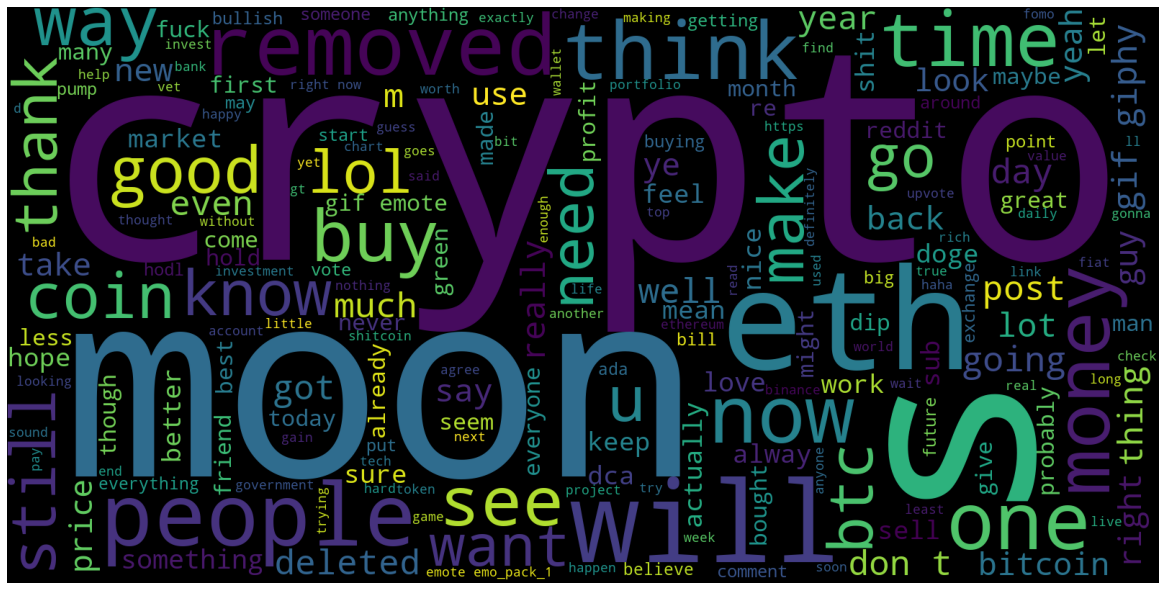

In [192]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for x in df2.body:
     
    # typecaste each val to string
    x = str(x)
 
    # split the value
    tokens = x.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1600, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (16, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

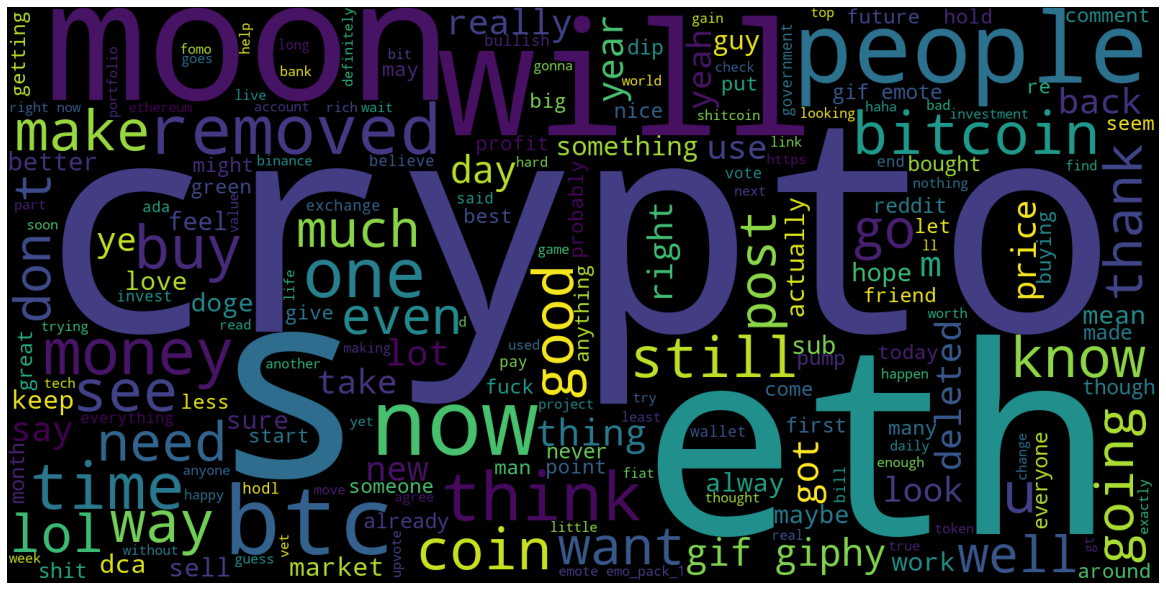

In [193]:
# iterate through the csv file
for x in bitcoin_df.body:
     
    # typecaste each val to string
    x = str(x)
 
    # split the value
    tokens = x.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1600, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (16, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## Sentiment Analysis

<AxesSubplot:>

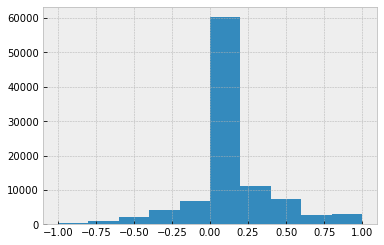

In [194]:
from textblob import TextBlob

# Polarity Histogram
def polarity(text):
    return TextBlob(text).sentiment.polarity

df2['polarity_score']=df2['body'].\
   apply(lambda x : polarity(x))
df2['polarity_score'].hist()

<AxesSubplot:>

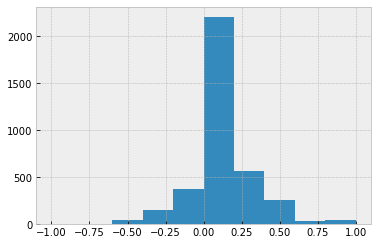

In [195]:
# Plot Bitcoin Polarity Histogram
def polarity(text):
    return TextBlob(text).sentiment.polarity

bitcoin_df2['polarity_score']=bitcoin_df2['body'].\
   apply(lambda x : polarity(x))
bitcoin_df2['polarity_score'].hist()

Majority of comments are neutral

## Sentiment Barchart

In [196]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def sentiment_vader(text, sid):
    ss = sid.polarity_scores(text)
    ss.pop('compound')
    return max(ss, key=ss.get)

def sentiment_textblob(text):
        x = TextBlob(text).sentiment.polarity
        
        if x<0:
            return 'neg'
        elif x==0:
            return 'neu'
        else:
            return 'pos'

def sentiment_barchart(text, method='TextBlob'):
    if method == 'TextBlob':
        sentiment = text.map(lambda x: sentiment_textblob(x))
    elif method == 'Vader':
        nltk.download('vader_lexicon')
        sid = SentimentIntensityAnalyzer()
        sentiment = text.map(lambda x: sentiment_vader(x, sid=sid))
    else:
        raise ValueError('Textblob or Vader')
    
    plt.bar(sentiment.value_counts().index,
            sentiment.value_counts())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User1\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


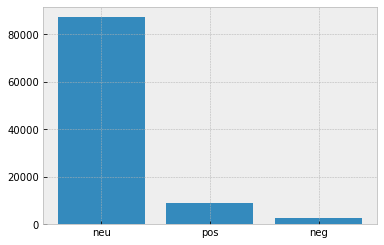

In [197]:
sentiment_barchart(df2['body'], method='Vader')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User1\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


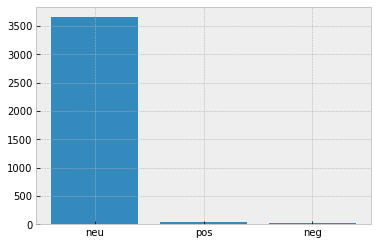

In [198]:
# Plot bitcoin dataframe
sentiment_barchart(bitcoin_df2['body'], method='Vader')

## Sentiment Analysis with Vader

In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [221]:
analyser = SentimentIntensityAnalyzer()

In [222]:
# function to calculate polarity scores
pol = lambda x: analyser.polarity_scores(x)

In [223]:
clean_df = bitcoin_df2
clean_df.head()

author author_fullname author_premium  \
6          atomwest314       t2_x50okt           True   
23           Shrappy16     t2_4e2hp2d0          False   
29       Odd_Copy_8077     t2_ajd0894j          False   
91   Much-Weekend-8882     t2_66sa37r1          False   
114           itsglocx     t2_c3slvp4i          False   

                                                  body collapsed_reason_code  \
6    i noticed this too peeps like 'o wow ICP go up...                   NaN   
23   Probably know the answer: If you earned enough...                   NaN   
29   A boy asked his bitcoin-investing dad for 1 bi...                   NaN   
91             Is this all time high of eth/btc ratio?                   NaN   
114  can you imagine being mad at bitcoin going dow...                   NaN   

     comment_type  created_utc  score       id   parent_id  \
6             NaN   1628333275      3  h81jxhz   t3_ozr2hx   
23            NaN   1628333265      1  h81jx4f   t3_oznwv4   
29            NaN   1628333261      4  h81jwxn  t1_h81jr69   
91            NaN   1628333204      2  h81juiz   t3_ozinnf   
114           NaN   1628341913      1  h81wcat   t3_ozsz9f   

                                             permalink  polarity_score  \
6    /r/CryptoCurrency/comments/ozr2hx/can_we_pleas...        0.266667   
23   /r/CryptoCurrency/comments/oznwv4/eth_just_com...        0.000000   
29   /r/CryptoCurrency/comments/ozinnf/daily_discus...        0.000000   
91   /r/CryptoCurrency/comments/ozinnf/daily_discus...        0.160000   
114  /r/CryptoCurrency/comments/ozsz9f/a_snapshot_i...       -0.193519   

                                              polarity  
6    {'neg': 0.0, 'neu': 0.759, 'pos': 0.241, 'comp...  
23   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
29   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
91   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
114  {'neg': 0.104, 'neu': 0.697, 'pos': 0.199, 'co...

In [224]:
clean_df.shape

(3716, 13)

In [225]:
# creating new column 'polarity' in clean_df
clean_df['polarity'] = clean_df['body'].apply(pol)

In [226]:
# checking that worked
clean_df.head()

author author_fullname author_premium  \
6          atomwest314       t2_x50okt           True   
23           Shrappy16     t2_4e2hp2d0          False   
29       Odd_Copy_8077     t2_ajd0894j          False   
91   Much-Weekend-8882     t2_66sa37r1          False   
114           itsglocx     t2_c3slvp4i          False   

                                                  body collapsed_reason_code  \
6    i noticed this too peeps like 'o wow ICP go up...                   NaN   
23   Probably know the answer: If you earned enough...                   NaN   
29   A boy asked his bitcoin-investing dad for 1 bi...                   NaN   
91             Is this all time high of eth/btc ratio?                   NaN   
114  can you imagine being mad at bitcoin going dow...                   NaN   

     comment_type  created_utc  score       id   parent_id  \
6             NaN   1628333275      3  h81jxhz   t3_ozr2hx   
23            NaN   1628333265      1  h81jx4f   t3_oznwv4   
29            NaN   1628333261      4  h81jwxn  t1_h81jr69   
91            NaN   1628333204      2  h81juiz   t3_ozinnf   
114           NaN   1628341913      1  h81wcat   t3_ozsz9f   

                                             permalink  polarity_score  \
6    /r/CryptoCurrency/comments/ozr2hx/can_we_pleas...        0.266667   
23   /r/CryptoCurrency/comments/oznwv4/eth_just_com...        0.000000   
29   /r/CryptoCurrency/comments/ozinnf/daily_discus...        0.000000   
91   /r/CryptoCurrency/comments/ozinnf/daily_discus...        0.160000   
114  /r/CryptoCurrency/comments/ozsz9f/a_snapshot_i...       -0.193519   

                                              polarity  
6    {'neg': 0.0, 'neu': 0.759, 'pos': 0.241, 'comp...  
23   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
29   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
91   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
114  {'neg': 0.104, 'neu': 0.697, 'pos': 0.199, 'co...

In [206]:
# dropping unessential columns and seperating out 'polarity' dictionary
#df3 = pd.concat([clean_df.drop(['author_fullname'], axis=1), clean_df['polarity'].apply(pd.Series)], axis=1)
df3 = pd.concat([clean_df, clean_df['polarity'].apply(pd.Series)], axis=1)

In [207]:
df3.head()

author author_fullname author_premium  \
6          atomwest314       t2_x50okt           True   
23           Shrappy16     t2_4e2hp2d0          False   
29       Odd_Copy_8077     t2_ajd0894j          False   
91   Much-Weekend-8882     t2_66sa37r1          False   
114           itsglocx     t2_c3slvp4i          False   

                                                  body collapsed_reason_code  \
6    i noticed this too peeps like 'o wow ICP go up...                   NaN   
23   Probably know the answer: If you earned enough...                   NaN   
29   A boy asked his bitcoin-investing dad for 1 bi...                   NaN   
91             Is this all time high of eth/btc ratio?                   NaN   
114  can you imagine being mad at bitcoin going dow...                   NaN   

     comment_type  created_utc  score       id   parent_id  \
6             NaN   1628333275      3  h81jxhz   t3_ozr2hx   
23            NaN   1628333265      1  h81jx4f   t3_oznwv4   
29            NaN   1628333261      4  h81jwxn  t1_h81jr69   
91            NaN   1628333204      2  h81juiz   t3_ozinnf   
114           NaN   1628341913      1  h81wcat   t3_ozsz9f   

                                             permalink  polarity_score  \
6    /r/CryptoCurrency/comments/ozr2hx/can_we_pleas...        0.266667   
23   /r/CryptoCurrency/comments/oznwv4/eth_just_com...        0.000000   
29   /r/CryptoCurrency/comments/ozinnf/daily_discus...        0.000000   
91   /r/CryptoCurrency/comments/ozinnf/daily_discus...        0.160000   
114  /r/CryptoCurrency/comments/ozsz9f/a_snapshot_i...       -0.193519   

                                              polarity    neg    neu    pos  \
6    {'neg': 0.0, 'neu': 0.759, 'pos': 0.241, 'comp...  0.000  0.759  0.241   
23   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  0.000  1.000  0.000   
29   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  0.000  1.000  0.000   
91   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  0.000  1.000  0.000   
114  {'neg': 0.104, 'neu': 0.697, 'pos': 0.199, 'co...  0.104  0.697  0.199   

     compound  
6      0.9013  
23     0.0000  
29     0.0000  
91     0.0000  
114    0.4404

In [208]:
# new dataframe with average polarity score for each label
scores_df = pd.DataFrame()
scores_df['avg_positive'] = str(df3['pos'].mean())
scores_df['avg_neutral'] = str(df3['neu'].mean())
scores_df['avg_negative'] = str(df3['neg'].mean())
scores_df['avg_compound'] = str(df3['compound'].mean())

In [214]:
d = datetime.fromtimestamp(int(df3['created_utc'].iloc[0]))

In [219]:
str(d).split(' 00:00:00', 1)[0]

'2021-08-07 04:47:55'

In [51]:
scores_df.head()

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Empty DataFrame
Columns: [avg_positive, avg_neutral, avg_negative, avg_compound]
Index: []

In [143]:
# print average polarity score for each label
print('The average Positive score = ' + str(df3['pos'].mean()))
print('The average Neutral score = ' + str(df3['neu'].mean()))
print('The average Negative score = ' + str(df3['neg'].mean()))
print('The average Compound score = ' + str(df3['compound'].mean()))

The average Positive score = 0.1009709364908503
The average Neutral score = 0.8521111410118416
The average Negative score = 0.04691872981700745
The average Compound score = 0.1707172228202371


In [53]:
# counting unique values
u = len(pd.unique(df2['author']))
  
print("Number of unique values :", u)

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of unique values : 11312


In [54]:
# Count unique calues in each column
print(df2['author'].value_counts())

[deleted]               6117
SnoewZ                   580
Obito_DOS3               528
ccModBot                 465
Too_raw90                414
                        ... 
Noxidy                     1
Maximum_Ad_8241            1
King_Esot3ric              1
Dazzling_Formal_6756       1
sue_wue                    1
Name: author, Length: 11312, dtype: int64


C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Name Entity Recognition

https://stackoverflow.com/questions/66367475/oserror-e050-cant-find-model-en-core-web-sm-it-doesnt-seem-to-be-a-short

In [59]:
import spacy
from collections import  Counter
import seaborn as sns

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [65]:
def named_entity_barchart(text):
    nlp = spacy.load("en_core_web_sm")
    
    def _get_ner(text):
        doc=nlp(text)
        return [X.label_ for X in doc.ents]
    
    ent=text.apply(lambda x : _get_ner(x))
    ent=[x for sub in ent for x in sub]
    counter=Counter(ent)
    count=counter.most_common()
    
    x,y=map(list,zip(*count))
    sns.barplot(x=y,y=x)

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


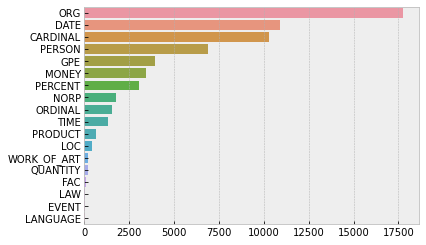

In [61]:
named_entity_barchart(df2['body'])

## Frequency of Commonly Named Entities Barchart

In [67]:
def most_common_named_entity_barchart(text, entity="PERSON"):
    nlp = spacy.load("en_core_web_sm")
    
    def _get_ner(text,ent):
        doc=nlp(text)
        return [X.text for X in doc.ents if X.label_ == ent]

    entity_filtered=text.apply(lambda x: _get_ner(x,entity))
    entity_filtered=[i for x in entity_filtered for i in x]
    
    counter=Counter(entity_filtered)
    x,y=map(list,zip(*counter.most_common(10)))
    sns.barplot(y,x).set_title(entity)

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


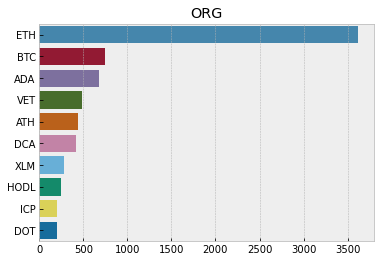

In [63]:
most_common_named_entity_barchart(df2['body'], entity="ORG")

In [68]:
most_common_named_entity_barchart(df2['body'], entity="CARDINAL")

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
most_common_named_entity_barchart(df2['body'], entity="PERSON")

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [70]:
most_common_named_entity_barchart(df2['body'], entity="GPE")

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Plot ticker symbol price

In [71]:
btc_df = pd.read_csv('../Data/Historical/BTC.csv')

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
btc_df.head()

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


time     low    high    open   close       volume
0  2015-07-20  277.37  280.00  277.98  280.00   782.883420
1  2015-07-21  276.85  281.27  279.96  277.32  4943.559434
2  2015-07-22  275.01  278.54  277.33  277.89  4687.909383
3  2015-07-23  276.28  279.75  277.96  277.39  5306.919575
4  2015-07-24  276.43  291.52  277.23  289.12  7362.469083

In [73]:
btc_df.dtypes

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


time       object
low       float64
high      float64
open      float64
close     float64
volume    float64
dtype: object

In [74]:
# Make time column a series with dtype datetime64[ns]
btc_df['time'] = pd.to_datetime(btc_df['time'])

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [75]:
#greater than the start date and smaller than the end date
mask = (btc_df['time'] >= '2021-8-7T00:00') & (btc_df['time'] <= '2021-9-8T00:00')

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [77]:
mask_df = btc_df.loc[mask]

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [78]:
mask_df.head()

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


time       low      high      open     close        volume
2210 2021-08-07  42457.27  44750.00  42869.59  44637.34  19634.794756
2211 2021-08-08  43131.97  45363.83  44628.11  43829.14  18712.271582
2212 2021-08-09  42821.30  46497.42  43829.15  46285.48  19464.724935
2213 2021-08-10  44650.27  46718.44  46280.00  45595.66  13756.500669
2214 2021-08-11  45350.74  46781.09  45601.82  45553.49  11628.320440

In [80]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime

fig = go.Figure(data=[go.Candlestick(x=mask_df['time'],
                open=mask_df['open'],
                high=mask_df['high'],
                low=mask_df['low'],
                close=mask_df['close'])])

fig.show()

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
